# NN from scratch - Part 2

Links:

* Google Colab: https://colab.research.google.com
* Keras MNIST: https://www.tensorflow.org/tutorials/quickstart/beginner
* TF2 Keras Dense Layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
* NEAT: https://en.wikipedia.org/wiki/Neuroevolution_of_augmenting_topologies



## Imports

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Previous Time

## Data Loader

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
size = x_train[0].shape # Used for input of NN

11493376/11490434 [==============================] - 0s 0us/step


## Helper Functions

In [ ]:
def plot_number(n):
    plt.imshow(n)

Plot a sample from the data

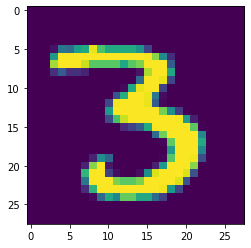

In [ ]:
plot_number(x_train[12])

### Create and train a model

Build model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='sigmoid')
])

Add loss function, optimizer and compile model

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

train the model

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6363 - accuracy: 0.8801
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5383 - accuracy: 0.9298
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5203 - accuracy: 0.9426
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5103 - accuracy: 0.9511
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5034 - accuracy: 0.9578
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4983 - accuracy: 0.9632
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4942 - accuracy: 0.9668
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4909 - accuracy: 0.9705
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4880 - accuracy: 0.9733
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.485

Evaluate the model

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.4939 - accuracy: 0.9668


[1.4939284324645996, 0.9667999744415283]

'Use' the model

Prediction: 3 - Actual: 3


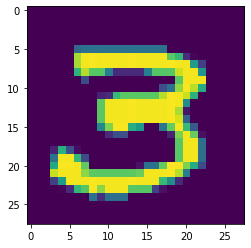

In [ ]:
n = np.random.randint(0, len(x_test))
plot_number(x_test[n])
prediction = np.argmax(model(x_test[n].reshape(1, size[0], size[1])).numpy())
print("Prediction:", prediction, "- Actual:", y_test[n])

Extract the weights from the model and print shape of each layer



In [ ]:
type(model.get_weights())

list

In [ ]:
weights = []
for l in model.get_weights():
    weights.append(l)
    print(l.shape)
    print(type(l))

(784, 128)
<class 'numpy.ndarray'>
(128,)
<class 'numpy.ndarray'>
(128, 10)
<class 'numpy.ndarray'>
(10,)
<class 'numpy.ndarray'>


Create sigmoid activation function

$ \frac{1}{1 + exp{-x}}$

In [ ]:
def sigmoid(i):
    return 1 / (1 + np.exp(-i))

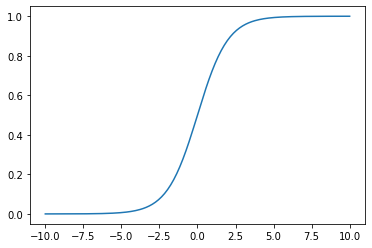

In [ ]:
xs = np.linspace(-10, 10, 200)
plt.plot(xs, sigmoid(xs));

## Build custom NN class

In [ ]:
class NN:

    @staticmethod
    def sigmoid(i) -> np.array:
        return 1 / (1 + np.exp(-i))

    @staticmethod
    def relu(i) -> np.array:
        return np.maximum(0, i)

    @staticmethod
    def dense(x, kernel, bias, activation):
        return activation(np.dot(x, kernel) + bias)


class MyNN(NN):

    def __init__(self, weights) -> None:
        self.weights = weights

    def predict(self, x):
        x = x.flatten()
        x = self.dense(x, self.weights[0], self.weights[1], self.sigmoid)
        x = self.dense(x, self.weights[2], self.weights[3], self.sigmoid)
        return np.argmax(x)

Test custom class

Prediction: 4 - Actual: 4


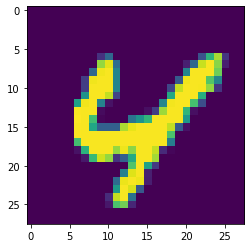

In [ ]:
n = np.random.randint(0, len(x_test))
plot_number(x_test[n])
model = MyNN(weights)
prediction = model.predict(x_test[n])
print("Prediction:", prediction, "- Actual:", y_test[n])

# TODAY - 'NEAT'

1. [x] Create Random weights (How to get the shape?)
2. [x] Calculate 'fitness' of the weights
3. [x] Create population
4. Evolve:
    - Sort on 'fitness'
    - Reproduce/Mutate
    - Calculate 'fitness'
    - repeat...
5. Evaluate

In [ ]:
# Extract 0's and 1's from traing set
indices_1 = np.where(y_train == 1)[0]
indices_0 = np.where(y_train == 0)[0]
indices = np.concatenate([indices_1,indices_0])
print(indices)
len(indices)

[    3     6     8 ... 59952 59972 59987]


12665

In [ ]:
X = x_train[indices]
y = y_train[indices]

In [ ]:
shapes = [(784, 128), (128,), (128, 2), (2,)]
def init_random_weights():
    w = []
    for layer in shapes:
        if len(layer) == 2:
            w.append(np.random.rand(layer[0], layer[1]))
        else:
            w.append(np.random.rand(layer[0]))
    return w  

In [ ]:
w = init_random_weights()

prediction 0
actual 1


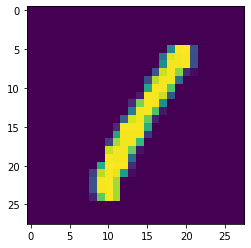

In [ ]:
nn = MyNN(w)
plot_number(X[0])
print("prediction", nn.predict(X[0]))
print("actual", y[0])

In [ ]:
len(X), len(y)

(12665, 12665)

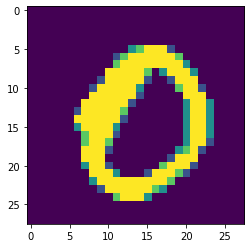

In [ ]:
plot_number(X[-100])

In [ ]:
def calc_fitness(nn):
    sum = 0
    for i, x in enumerate(X):
        a = nn.predict(x)
        if a == y[i]:
            sum += 1
    print(sum)
    return sum / len(X)

print(calc_fitness(nn)) #WHY ALWAYS THE SAME NUMBER!?

5923
0.46766679826292934


In [ ]:
import gc # Garbage collection?

In [ ]:
class Population:

    def __init__(self):
        self.population_size = 100
        self.mut_prob = 0.01
        self.population = []
        self.fitness_list = []
        self.init_population()

    def init_population(self):
        for _ in range(self.population_size):
            w = init_random_weights()
            self.population.append(MyNN(w))

    def calc_population_fitness(self):
        self.fitness_list = []
        for i, nn in enumerate(self.population):
            fitness = calc_fitness(nn)
            self.fitness_list.append(fitness)

    def mutate(self, w):
        for i, layer in enumerate(w):
            for idx, _ in np.ndenumerate(layer):
                if np.random.random() < self.mut_prob:
                    w[i][idx] += ((np.random.random() - 0.5) * 0.01)
        return w

    def print_highest_fitness(self):
        return max(self.fitness_list)

    def next_generation(self):
        new_pop = []
        # Put fittest individual in the new population
        new_pop.append(self.population[np.argmax(self.fitness_list)])
        prob = np.array(self.fitness_list)
        prob_list = prob / prob.sum()
        # pick individual based on fitness
        for ind in np.random.choice(self.population, size=self.population_size-1, p=prob_list):
            ind.weights = self.mutate(ind.weights)
            new_pop.append(ind)
        self.population = new_pop

pop = Population()
for i in range(100):
    pop.calc_population_fitness()
    print(f"generation {i}: {pop.print_highest_fitness()}")
    pop.next_generation()
    gc.collect()

KeyboardInterrupt: ignored